In [252]:
import pandas as pd
import numpy as np 
from functools import reduce
import re

In [253]:
houses_for_sale = pd.read_csv('rawdata/Dataset_houses_for_sale.csv')

In [254]:
houses_for_sale.shape

(11269, 28)

In [255]:
columns_to_drop=['source','permalink','other_listings','open_houses','branding','coming_soon_date','matterport','search_promotions',
                 'rent_to_own','products','virtual_tours','community','price_reduced_amount']

In [256]:
houses_for_sale.drop(columns=columns_to_drop,inplace=True)

In [257]:
descriptions = []
ids=[]
for index, row in houses_for_sale.groupby('property_id')['description'].apply(list).reset_index().iterrows():
    id=str(row['property_id'])
    
    if len(row['description']) > 1:

        descriptions.append(row['description'])
        ids.append(id)
        if len(ids) >2:
            break


In [258]:
ids

['1034050928', '1117136034', '1156155585']

Evidenciamos que algunas de las propiedades tienen 2 valores en la columna descripcion

In [259]:
descriptions[0]

["{'sqft': 2963, 'baths_consolidated': '3', 'lot_sqft': 12876, 'sold_price': 66045, 'baths_3qtr': None, 'baths_full': 3, 'name': None, 'sold_date': '1978-11-07', 'sub_type': None, 'year_built': 1979, 'garage': 2, 'baths_half': None, 'baths': 3, 'baths_1qtr': None, 'stories': 1, 'beds': 4, 'type': 'single_family'}",
 "{'sqft': 2963, 'baths_consolidated': '3', 'lot_sqft': 12876, 'sold_price': 66045, 'baths_3qtr': None, 'baths_full': 3, 'name': None, 'sold_date': '1978-11-07', 'sub_type': None, 'year_built': 1979, 'garage': 2, 'baths_half': None, 'baths': 3, 'baths_1qtr': None, 'stories': 1, 'beds': 4, 'type': 'single_family'}"]

In [260]:
houses_for_sale[houses_for_sale['property_id']== 1034050928]

,primary_photo,last_update_date,tags,list_date,description,photos,flags,lead_attributes,tax_record,list_price,property_id,location,listing_id,primary,status
276,{'href': 'https://ap.rdcpix.com/e578888ca31258...,2023-09-28T11:30:32Z,"['community_outdoor_space', 'den_or_office', '...",2023-09-28T17:12:07Z,"{'sqft': 2963, 'baths_consolidated': '3', 'lot...",[{'href': 'https://ap.rdcpix.com/e578888ca3125...,"{'is_new_construction': None, 'is_subdivision'...","{'show_contact_an_agent': True, 'lead_type': '...",{'public_record_id': '34D0D110C50931F88D8A93FE...,925000.0,1034050928,"{'address': {'postal_code': '85254', 'state': ...",2.960065e+09,True,for_sale
472,{'href': 'https://ap.rdcpix.com/e578888ca31258...,2023-09-28T11:30:32Z,"['community_outdoor_space', 'den_or_office', '...",2023-09-28T17:12:07Z,"{'sqft': 2963, 'baths_consolidated': '3', 'lot...",[{'href': 'https://ap.rdcpix.com/e578888ca3125...,"{'is_new_construction': None, 'is_subdivision'...","{'show_contact_an_agent': True, 'lead_type': '...",{'public_record_id': '34D0D110C50931F88D8A93FE...,925000.0,1034050928,"{'address': {'postal_code': '85254', 'state': ...",2.960065e+09,True,for_sale


Aqui notamos que esos valores son exactamente iguales por lo que eliminaremos duplicados

In [261]:
houses_for_sale.drop_duplicates(subset='property_id', inplace = True)


In [262]:
df = houses_for_sale.groupby('property_id')['description'].apply(list).reset_index()

In [263]:
def data_processor(df, columnas, columna_target):
    
    # Inicializa una lista vacía llamada 'lista_dics_datos' para almacenar los datos transformados.
    lista_dics_datos = []
    
    # Itera a través de las filas del DataFrame 'df'.
    for _, row in df.iterrows():
        
        # Extrae el 'user_id' de la fila actual.
        property_id = row['property_id']
        
        
            
        # Itera a través de los elementos en la columna especificada por 'columna_target'.
        for elemento in row[columna_target]:

            if elemento is not None:
                try:
                    # Crea un nuevo diccionario 'elemento_data' que contiene la información de la fila actual.
                    elemento_data = eval(elemento).copy()
                except:
                    elemento_data = elemento.copy()
            else:
                elemento_data = {}
                
            # Agrega información adicional al diccionario 'elemento_data'.
            elemento_data['property_id'] = property_id       
                       
            # Agrega el diccionario 'review_data' a la lista 'listadatos'.
            lista_dics_datos.append(elemento_data)

    # Crea un nuevo DataFrame 'df_limpio' a partir de la lista 'lista_dics_datos'
    # utilizando las columnas especificadas en 'columnas'.
    df_limpio = pd.DataFrame(lista_dics_datos, columns=columnas)
    
    # Devuelve el nuevo DataFrame 'df_limpio'.
    return df_limpio

In [264]:
columns = ['property_id']
columns +=[x for x in eval(df['description'][0][0]).keys()]


In [265]:
df_temporal = data_processor(df,columns,'description')
df_temporal.head()
    

,property_id,sqft,baths_consolidated,lot_sqft,sold_price,baths_3qtr,baths_full,name,sold_date,sub_type,year_built,garage,baths_half,baths,baths_1qtr,stories,beds,type
0,1000163193,1111.0,2,5000.0,288000.0,NaN,2.0,None,2003-04-28,None,1942.0,1.0,NaN,2.0,NaN,1.0,2.0,single_family
1,1000748625,3126.0,3,10454.0,725000.0,2.0,1.0,None,2021-08-02,None,1959.0,2.0,NaN,3.0,NaN,NaN,4.0,single_family
2,1001237574,3836.0,3.5,15284.0,1171796.0,NaN,3.0,None,2020-01-28,None,2019.0,4.0,1.0,4.0,NaN,1.0,4.0,single_family
3,1001483948,2200.0,3,6098.0,150000.0,NaN,3.0,None,1992-09-15,None,1992.0,2.0,NaN,3.0,NaN,2.0,4.0,single_family
4,1001489359,856.0,1,4264.0,490000.0,NaN,1.0,None,2005-06-21,None,1943.0,1.0,NaN,1.0,NaN,1.0,2.0,single_family


In [266]:
df_final = pd.merge(df_temporal,houses_for_sale, on='property_id')
df_final.head()

,property_id,sqft,baths_consolidated,lot_sqft,sold_price,baths_3qtr,baths_full,name,sold_date,sub_type,...,description,photos,flags,lead_attributes,tax_record,list_price,location,listing_id,primary,status
0,1000163193,1111.0,2,5000.0,288000.0,NaN,2.0,None,2003-04-28,None,...,"{'sqft': 1111, 'baths_consolidated': '2', 'lot...",[{'href': 'https://ap.rdcpix.com/c40746b359c3d...,"{'is_new_construction': None, 'is_subdivision'...","{'show_contact_an_agent': True, 'lead_type': '...",{'public_record_id': '5A80D02213D3B527591DB04E...,899000.0,"{'address': {'postal_code': '94804', 'state': ...",2.959741e+09,True,for_sale
1,1000748625,3126.0,3,10454.0,725000.0,2.0,1.0,None,2021-08-02,None,...,"{'sqft': 3126, 'baths_consolidated': '3', 'lot...",[{'href': 'https://ap.rdcpix.com/7501bd1b85a32...,"{'is_new_construction': None, 'is_subdivision'...","{'show_contact_an_agent': True, 'lead_type': '...",{'public_record_id': '1655999C5B9E720FC624F319...,870000.0,"{'address': {'postal_code': '98208', 'state': ...",2.960037e+09,True,for_sale
2,1001237574,3836.0,3.5,15284.0,1171796.0,NaN,3.0,None,2020-01-28,None,...,"{'sqft': 3836, 'baths_consolidated': '3.5', 'l...",[{'href': 'https://ap.rdcpix.com/fd492f6878f09...,"{'is_new_construction': None, 'is_subdivision'...","{'show_contact_an_agent': True, 'lead_type': '...",{'public_record_id': '414DA59200A9FB074A4A2258...,1899000.0,"{'address': {'postal_code': '85383', 'state': ...",2.960018e+09,True,for_sale
3,1001483948,2200.0,3,6098.0,150000.0,NaN,3.0,None,1992-09-15,None,...,"{'sqft': 2200, 'baths_consolidated': '3', 'lot...",[{'href': 'https://ap.rdcpix.com/0487398867f4f...,"{'is_new_construction': None, 'is_subdivision'...","{'show_contact_an_agent': True, 'lead_type': '...",{'public_record_id': '2E8180162121CBCF83156981...,679000.0,"{'address': {'postal_code': '92591', 'state': ...",2.959985e+09,True,for_sale
4,1001489359,856.0,1,4264.0,490000.0,NaN,1.0,None,2005-06-21,None,...,"{'sqft': 856, 'baths_consolidated': '1', 'lot_...",[{'href': 'https://ap.rdcpix.com/8926b1a848f53...,"{'is_new_construction': None, 'is_subdivision'...","{'show_contact_an_agent': True, 'lead_type': '...",{'public_record_id': '582E1A96C2D5D35349D78F4B...,799000.0,"{'address': {'postal_code': '94602', 'state': ...",2.960011e+09,True,for_sale


In [267]:
def unraveler(df, target_columns:list):

    dfs_temporales =[]
    for column in target_columns:
        
        df_grouped = df.groupby('property_id')[column].apply(list).reset_index()

        columns = ['property_id']
        try:
            columns +=[x for x in eval(df_grouped[column][0][0]).keys()]
        except:
            columns +=[x for x in (df_grouped[column][0][0]).keys()]
        df_temporal = data_processor(df_grouped,columns,column)
        dfs_temporales.append(df_temporal)

    resultado = reduce(lambda left, right: pd.merge(left, right, on='property_id'), dfs_temporales)
    
    resultado = pd.merge(resultado,df, on='property_id')
    return resultado
    

In [268]:
for column in df_final.columns:
    if type(df_final[column][2]) is str:
        print( column , df_final[column][2]+'\n')

baths_consolidated 3.5

sold_date 2020-01-28

type single_family

primary_photo {'href': 'https://ap.rdcpix.com/fd492f6878f09cbe6eda231a8fcceb73l-m763238679s-w1024_h768.jpg'}

last_update_date 2023-09-27T17:49:09Z

tags ['community_boat_facilities', 'community_golf', 'community_outdoor_space', 'community_security_features', 'den_or_office', 'energy_efficient', 'fireplace', 'golf_course_lot_or_frontage', 'golf_course_view', 'laundry_room', 'pets_allowed', 'recreation_facilities', 'view', 'single_story', 'garage_1_or_more', 'garage_2_or_more', 'garage_3_or_more', 'gourmet_kitchen', 'high_ceiling', 'wine_cellar', 'gated_community', 'clubhouse', 'golf_course', 'views', 'groundscare', 'security']

list_date 2023-09-27T05:04:46Z

description {'sqft': 3836, 'baths_consolidated': '3.5', 'lot_sqft': 15284, 'sold_price': 1171796, 'baths_3qtr': None, 'baths_full': 3, 'name': None, 'sold_date': '2020-01-28', 'sub_type': None, 'year_built': 2019, 'garage': 4, 'baths_half': 1, 'baths': 4, 'baths_1qt

In [269]:
dropeable_columns = ['last_update_date', 'description','lead_attributes', 'tax_record']
df_final.drop(columns=dropeable_columns, inplace = True)

In [270]:
for column in df_final.columns:
    if type(df_final[column][2]) is str:
        print( column , df_final[column][2]+'\n')

baths_consolidated 3.5

sold_date 2020-01-28

type single_family

primary_photo {'href': 'https://ap.rdcpix.com/fd492f6878f09cbe6eda231a8fcceb73l-m763238679s-w1024_h768.jpg'}

tags ['community_boat_facilities', 'community_golf', 'community_outdoor_space', 'community_security_features', 'den_or_office', 'energy_efficient', 'fireplace', 'golf_course_lot_or_frontage', 'golf_course_view', 'laundry_room', 'pets_allowed', 'recreation_facilities', 'view', 'single_story', 'garage_1_or_more', 'garage_2_or_more', 'garage_3_or_more', 'gourmet_kitchen', 'high_ceiling', 'wine_cellar', 'gated_community', 'clubhouse', 'golf_course', 'views', 'groundscare', 'security']

list_date 2023-09-27T05:04:46Z

photos [{'href': 'https://ap.rdcpix.com/fd492f6878f09cbe6eda231a8fcceb73l-m763238679s-w1024_h768.jpg'}, {'href': 'https://ap.rdcpix.com/fd492f6878f09cbe6eda231a8fcceb73l-m3583859794s-w1024_h768.jpg'}]

flags {'is_new_construction': None, 'is_subdivision': None, 'is_plan': None, 'is_price_reduced': None, 

In [271]:
def extraer_numeros(cadena):
    # Utiliza expresiones regulares para encontrar todos los números en la cadena.
    # El patrón \d+\.\d+|\d+ busca números enteros o decimales en la cadena.
    numeros_encontrados = re.findall(r'\d+\.\d+|\d+', str(cadena))
    
    # Si se encuentran números en la cadena:
    if numeros_encontrados:
        # Une los números encontrados utilizando comas y devuelve la cadena resultante.
        return ','.join(numeros_encontrados)
    
    # Si no se encuentran números en la cadena, devuelve 0.
    return np.nan

In [272]:
df_final['baths_consolidated'] = df_final['baths_consolidated'].apply(extraer_numeros)

In [273]:
df_final['baths_consolidated'] = df_final['baths_consolidated'].apply(float)

In [274]:
def convert_date(text):
    try:
        return pd.to_datetime(text, errors='raise')
    except ValueError:
        return np.nan

In [275]:
df_final['sold_date']=df_final['sold_date'].apply(convert_date)

In [276]:
len(df_final['sold_date'].unique())

4177

In [277]:
df_final[df_final['sold_date'].notna()].to_csv('Df_sold_homes.csv')

In [278]:
columns_to_drop = ['sold_date', 'sold_price', 'name','sub_type']
df_final.drop(columns=columns_to_drop, inplace= True)

In [279]:
df_final.columns


Index(['property_id', 'sqft', 'baths_consolidated', 'lot_sqft', 'baths_3qtr',
       'baths_full', 'year_built', 'garage', 'baths_half', 'baths',
       'baths_1qtr', 'stories', 'beds', 'type', 'primary_photo', 'tags',
       'list_date', 'photos', 'flags', 'list_price', 'location', 'listing_id',
       'primary', 'status'],
      dtype='object')

In [280]:
for column in df_final.columns:
    if type(df_final[column][2]) is str:
        print( f'{column}' , df_final[column][2]+'\n')

type single_family

primary_photo {'href': 'https://ap.rdcpix.com/fd492f6878f09cbe6eda231a8fcceb73l-m763238679s-w1024_h768.jpg'}

tags ['community_boat_facilities', 'community_golf', 'community_outdoor_space', 'community_security_features', 'den_or_office', 'energy_efficient', 'fireplace', 'golf_course_lot_or_frontage', 'golf_course_view', 'laundry_room', 'pets_allowed', 'recreation_facilities', 'view', 'single_story', 'garage_1_or_more', 'garage_2_or_more', 'garage_3_or_more', 'gourmet_kitchen', 'high_ceiling', 'wine_cellar', 'gated_community', 'clubhouse', 'golf_course', 'views', 'groundscare', 'security']

list_date 2023-09-27T05:04:46Z

photos [{'href': 'https://ap.rdcpix.com/fd492f6878f09cbe6eda231a8fcceb73l-m763238679s-w1024_h768.jpg'}, {'href': 'https://ap.rdcpix.com/fd492f6878f09cbe6eda231a8fcceb73l-m3583859794s-w1024_h768.jpg'}]

flags {'is_new_construction': None, 'is_subdivision': None, 'is_plan': None, 'is_price_reduced': None, 'is_pending': None, 'is_foreclosure': None, 'i

In [281]:
df_final['list_date']=(df_final['list_date'].astype(str).str.split('T')).str[0]

In [282]:
df_final['list_date'] = df_final['list_date'].apply(convert_date)

In [283]:
df_final[['primary_photo','tags','photos','flags','location']].head()

,primary_photo,tags,photos,flags,location
0,{'href': 'https://ap.rdcpix.com/c40746b359c3d7...,"['central_air', 'community_outdoor_space', 'di...",[{'href': 'https://ap.rdcpix.com/c40746b359c3d...,"{'is_new_construction': None, 'is_subdivision'...","{'address': {'postal_code': '94804', 'state': ..."
1,{'href': 'https://ap.rdcpix.com/7501bd1b85a32e...,"['basement', 'community_outdoor_space', 'dinin...",[{'href': 'https://ap.rdcpix.com/7501bd1b85a32...,"{'is_new_construction': None, 'is_subdivision'...","{'address': {'postal_code': '98208', 'state': ..."
2,{'href': 'https://ap.rdcpix.com/fd492f6878f09c...,"['community_boat_facilities', 'community_golf'...",[{'href': 'https://ap.rdcpix.com/fd492f6878f09...,"{'is_new_construction': None, 'is_subdivision'...","{'address': {'postal_code': '85383', 'state': ..."
3,{'href': 'https://ap.rdcpix.com/0487398867f4fd...,"['central_air', 'central_heat', 'city_view', '...",[{'href': 'https://ap.rdcpix.com/0487398867f4f...,"{'is_new_construction': None, 'is_subdivision'...","{'address': {'postal_code': '92591', 'state': ..."
4,{'href': 'https://ap.rdcpix.com/8926b1a848f534...,"['community_outdoor_space', 'den_or_office', '...",[{'href': 'https://ap.rdcpix.com/8926b1a848f53...,"{'is_new_construction': None, 'is_subdivision'...","{'address': {'postal_code': '94602', 'state': ..."


In [284]:
columns = ['flags','location']
df_final = unraveler(df_final, columns)

In [285]:
df_final.columns

Index(['property_id', 'is_new_construction', 'is_subdivision', 'is_plan',
       'is_price_reduced', 'is_pending', 'is_foreclosure', 'is_new_listing',
       'is_coming_soon', 'is_contingent', 'address', 'street_view_url',
       'county', 'sqft', 'baths_consolidated', 'lot_sqft', 'baths_3qtr',
       'baths_full', 'year_built', 'garage', 'baths_half', 'baths',
       'baths_1qtr', 'stories', 'beds', 'type', 'primary_photo', 'tags',
       'list_date', 'photos', 'flags', 'list_price', 'location', 'listing_id',
       'primary', 'status'],
      dtype='object')

In [286]:
df_final.drop(columns=['is_new_listing','is_pending','flags','location'], inplace = True)

In [287]:
for column in df_final.columns:
    if type(df_final[column][2]) is str:
        print( f'{column}' , df_final[column][2]+'\n')

street_view_url https://maps.googleapis.com/maps/api/streetview?channel=rdc-streetview&client=gme-movesalesinc&location=31010%20N%20117th%20Dr%2C%20Peoria%2C%20AZ%2085383&size=640x480&source=outdoor&signature=UWiFqjBXrMeXn8KQlA5gWBuNatU=

type single_family

primary_photo {'href': 'https://ap.rdcpix.com/fd492f6878f09cbe6eda231a8fcceb73l-m763238679s-w1024_h768.jpg'}

tags ['community_boat_facilities', 'community_golf', 'community_outdoor_space', 'community_security_features', 'den_or_office', 'energy_efficient', 'fireplace', 'golf_course_lot_or_frontage', 'golf_course_view', 'laundry_room', 'pets_allowed', 'recreation_facilities', 'view', 'single_story', 'garage_1_or_more', 'garage_2_or_more', 'garage_3_or_more', 'gourmet_kitchen', 'high_ceiling', 'wine_cellar', 'gated_community', 'clubhouse', 'golf_course', 'views', 'groundscare', 'security']

photos [{'href': 'https://ap.rdcpix.com/fd492f6878f09cbe6eda231a8fcceb73l-m763238679s-w1024_h768.jpg'}, {'href': 'https://ap.rdcpix.com/fd492f68

In [288]:
def safe_eval(expression):
    try:
        result = eval(expression)
        return result
    except Exception as e:

        if expression is np.nan:
            return expression
        else:
            
            print(f"Error en la evaluación: {e}, and was given {expression}")
            return expression


In [289]:
type(df_final['tags'][50])

str

In [290]:
df_final['tags'] = df_final['tags'].apply(safe_eval)

In [291]:
def get_tags(list):
    
    my_list = []
    try:
        for tag in list:
            my_list.append(tag)
        return my_list 
    except:
        return my_list

In [292]:
tags = []
for index, row in df_final.iterrows():
    
    tag=get_tags(row['tags'])

    tags+=tag

todos los tags

In [293]:
len(tags)

127814

tags unicos

In [294]:
len(set(tags))

168

In [295]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tu lista de palabras
lista_de_palabras = tags
# Convierte la lista en una cadena de texto
texto = " ".join(lista_de_palabras)


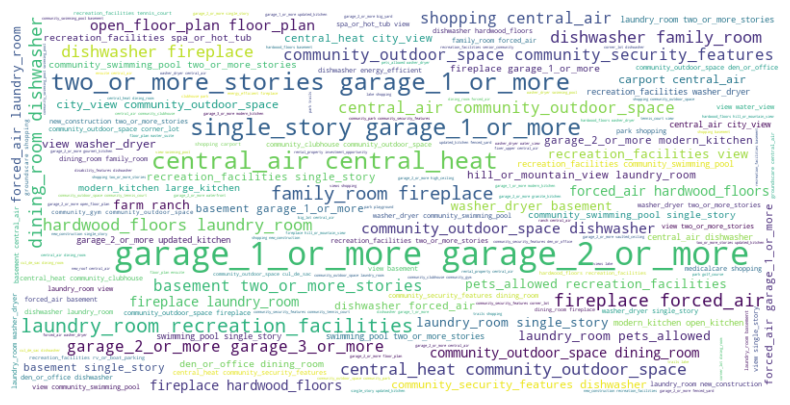

In [296]:
# Crea un objeto WordCloud
nube_de_palabras = WordCloud(width=800, height=400, background_color='white').generate(texto)

# Muestra la nube de palabras utilizando Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(nube_de_palabras, interpolation='bilinear')
plt.axis("off")
plt.show()


In [297]:
Start_tags=0
current_tags=1
while Start_tags != current_tags:
    Start_tags=len(tags)
    for tag in tags:
        if 'garage' in tag or 'story' in tag or 'stories' in tag:
            tags.remove(tag)
    current_tags=len(tags)

In [298]:
len(tags)

102813

In [299]:
tags_unicos ={}
for tag in tags:
    if tag not in tags_unicos.keys():

        tags_unicos[tag]=tags.count(tag)
    else:
        tags.remove(tag)




In [300]:
top_50_tags = pd.DataFrame(tags_unicos.values(),tags_unicos.keys()).sort_values(by=0,ascending=False).head(50).rename(columns={0:'count'})

In [301]:
df_final.columns

Index(['property_id', 'is_new_construction', 'is_subdivision', 'is_plan',
       'is_price_reduced', 'is_foreclosure', 'is_coming_soon', 'is_contingent',
       'address', 'street_view_url', 'county', 'sqft', 'baths_consolidated',
       'lot_sqft', 'baths_3qtr', 'baths_full', 'year_built', 'garage',
       'baths_half', 'baths', 'baths_1qtr', 'stories', 'beds', 'type',
       'primary_photo', 'tags', 'list_date', 'photos', 'list_price',
       'listing_id', 'primary', 'status'],
      dtype='object')

In [302]:
df_final = unraveler(df_final,['address'])
df_final.columns

Index(['property_id', 'postal_code', 'state', 'coordinate', 'city',
       'state_code', 'line', 'is_new_construction', 'is_subdivision',
       'is_plan', 'is_price_reduced', 'is_foreclosure', 'is_coming_soon',
       'is_contingent', 'address', 'street_view_url', 'county', 'sqft',
       'baths_consolidated', 'lot_sqft', 'baths_3qtr', 'baths_full',
       'year_built', 'garage', 'baths_half', 'baths', 'baths_1qtr', 'stories',
       'beds', 'type', 'primary_photo', 'tags', 'list_date', 'photos',
       'list_price', 'listing_id', 'primary', 'status'],
      dtype='object')

In [303]:
df_final.head()

,property_id,postal_code,state,coordinate,city,state_code,line,is_new_construction,is_subdivision,is_plan,...,beds,type,primary_photo,tags,list_date,photos,list_price,listing_id,primary,status
0,1000163193,94804,California,"{'lon': -122.340542, 'lat': 37.94899}",Richmond,CA,2814 Lowell Ave,None,None,None,...,2.0,single_family,{'href': 'https://ap.rdcpix.com/c40746b359c3d7...,"[central_air, community_outdoor_space, dishwas...",2023-09-16,[{'href': 'https://ap.rdcpix.com/c40746b359c3d...,899000.0,2.959741e+09,True,for_sale
1,1000748625,98208,Washington,"{'lon': -122.196956, 'lat': 47.91802}",Everett,WA,8729 Del Campo Dr,None,None,None,...,4.0,single_family,{'href': 'https://ap.rdcpix.com/7501bd1b85a32e...,"[basement, community_outdoor_space, dining_roo...",2023-09-27,[{'href': 'https://ap.rdcpix.com/7501bd1b85a32...,870000.0,2.960037e+09,True,for_sale
2,1001237574,85383,Arizona,"{'lon': -112.313678, 'lat': 33.763826}",Peoria,AZ,31010 N 117th Dr,None,None,None,...,4.0,single_family,{'href': 'https://ap.rdcpix.com/fd492f6878f09c...,"[community_boat_facilities, community_golf, co...",2023-09-27,[{'href': 'https://ap.rdcpix.com/fd492f6878f09...,1899000.0,2.960018e+09,True,for_sale
3,1001483948,92591,California,"{'lon': -117.133291, 'lat': 33.540322}",Temecula,CA,39920 N General Kearny Rd,None,None,None,...,4.0,single_family,{'href': 'https://ap.rdcpix.com/0487398867f4fd...,"[central_air, central_heat, city_view, den_or_...",2023-09-26,[{'href': 'https://ap.rdcpix.com/0487398867f4f...,679000.0,2.959985e+09,True,for_sale
4,1001489359,94602,California,"{'lon': -122.206693, 'lat': 37.804517}",Oakland,CA,2520 Rampart St,None,None,None,...,2.0,single_family,{'href': 'https://ap.rdcpix.com/8926b1a848f534...,"[community_outdoor_space, den_or_office, dinin...",2023-09-26,[{'href': 'https://ap.rdcpix.com/8926b1a848f53...,799000.0,2.960011e+09,True,for_sale


In [304]:
df_final = unraveler(df_final,['coordinate'])

In [305]:
df_final.head()

,property_id,lon,lat,postal_code,state,coordinate,city,state_code,line,is_new_construction,...,beds,type,primary_photo,tags,list_date,photos,list_price,listing_id,primary,status
0,1000163193,-122.340542,37.948990,94804,California,"{'lon': -122.340542, 'lat': 37.94899}",Richmond,CA,2814 Lowell Ave,None,...,2.0,single_family,{'href': 'https://ap.rdcpix.com/c40746b359c3d7...,"[central_air, community_outdoor_space, dishwas...",2023-09-16,[{'href': 'https://ap.rdcpix.com/c40746b359c3d...,899000.0,2.959741e+09,True,for_sale
1,1000748625,-122.196956,47.918020,98208,Washington,"{'lon': -122.196956, 'lat': 47.91802}",Everett,WA,8729 Del Campo Dr,None,...,4.0,single_family,{'href': 'https://ap.rdcpix.com/7501bd1b85a32e...,"[basement, community_outdoor_space, dining_roo...",2023-09-27,[{'href': 'https://ap.rdcpix.com/7501bd1b85a32...,870000.0,2.960037e+09,True,for_sale
2,1001237574,-112.313678,33.763826,85383,Arizona,"{'lon': -112.313678, 'lat': 33.763826}",Peoria,AZ,31010 N 117th Dr,None,...,4.0,single_family,{'href': 'https://ap.rdcpix.com/fd492f6878f09c...,"[community_boat_facilities, community_golf, co...",2023-09-27,[{'href': 'https://ap.rdcpix.com/fd492f6878f09...,1899000.0,2.960018e+09,True,for_sale
3,1001483948,-117.133291,33.540322,92591,California,"{'lon': -117.133291, 'lat': 33.540322}",Temecula,CA,39920 N General Kearny Rd,None,...,4.0,single_family,{'href': 'https://ap.rdcpix.com/0487398867f4fd...,"[central_air, central_heat, city_view, den_or_...",2023-09-26,[{'href': 'https://ap.rdcpix.com/0487398867f4f...,679000.0,2.959985e+09,True,for_sale
4,1001489359,-122.206693,37.804517,94602,California,"{'lon': -122.206693, 'lat': 37.804517}",Oakland,CA,2520 Rampart St,None,...,2.0,single_family,{'href': 'https://ap.rdcpix.com/8926b1a848f534...,"[community_outdoor_space, den_or_office, dinin...",2023-09-26,[{'href': 'https://ap.rdcpix.com/8926b1a848f53...,799000.0,2.960011e+09,True,for_sale


In [306]:
df_final.columns

Index(['property_id', 'lon', 'lat', 'postal_code', 'state', 'coordinate',
       'city', 'state_code', 'line', 'is_new_construction', 'is_subdivision',
       'is_plan', 'is_price_reduced', 'is_foreclosure', 'is_coming_soon',
       'is_contingent', 'address', 'street_view_url', 'county', 'sqft',
       'baths_consolidated', 'lot_sqft', 'baths_3qtr', 'baths_full',
       'year_built', 'garage', 'baths_half', 'baths', 'baths_1qtr', 'stories',
       'beds', 'type', 'primary_photo', 'tags', 'list_date', 'photos',
       'list_price', 'listing_id', 'primary', 'status'],
      dtype='object')

In [307]:
df_final = unraveler(df_final,['county'])

In [308]:
df_final.columns

Index(['property_id', 'fips_code', 'name', 'lon', 'lat', 'postal_code',
       'state', 'coordinate', 'city', 'state_code', 'line',
       'is_new_construction', 'is_subdivision', 'is_plan', 'is_price_reduced',
       'is_foreclosure', 'is_coming_soon', 'is_contingent', 'address',
       'street_view_url', 'county', 'sqft', 'baths_consolidated', 'lot_sqft',
       'baths_3qtr', 'baths_full', 'year_built', 'garage', 'baths_half',
       'baths', 'baths_1qtr', 'stories', 'beds', 'type', 'primary_photo',
       'tags', 'list_date', 'photos', 'list_price', 'listing_id', 'primary',
       'status'],
      dtype='object')

In [309]:
df_final.drop(columns=['coordinate','county','address'], inplace=True)

In [310]:
df_final.columns

Index(['property_id', 'fips_code', 'name', 'lon', 'lat', 'postal_code',
       'state', 'city', 'state_code', 'line', 'is_new_construction',
       'is_subdivision', 'is_plan', 'is_price_reduced', 'is_foreclosure',
       'is_coming_soon', 'is_contingent', 'street_view_url', 'sqft',
       'baths_consolidated', 'lot_sqft', 'baths_3qtr', 'baths_full',
       'year_built', 'garage', 'baths_half', 'baths', 'baths_1qtr', 'stories',
       'beds', 'type', 'primary_photo', 'tags', 'list_date', 'photos',
       'list_price', 'listing_id', 'primary', 'status'],
      dtype='object')

In [311]:
bath_columns= []
for column in df_final.columns:
    if 'bath' in column:
        bath_columns.append(column)

In [312]:
bath_columns

['baths_consolidated',
 'baths_3qtr',
 'baths_full',
 'baths_half',
 'baths',
 'baths_1qtr']

In [313]:
for column in bath_columns:
    for num in df_final[df_final['baths_consolidated'].isna()==True][column]:
        if num > 0:
            print(num)

como se observa en los casos en el cual la columna baths_consolidated es nula, las demas columnas referentes a los baños o son 0 o son nulos tambien por lo tanto la columna que resume toda la informacion sobre los baños es baths_consolidated


In [314]:
bath_columns.remove('baths_consolidated')

In [315]:
df_final.drop(bath_columns, axis=1, inplace=True)

In [316]:
df_final.columns

Index(['property_id', 'fips_code', 'name', 'lon', 'lat', 'postal_code',
       'state', 'city', 'state_code', 'line', 'is_new_construction',
       'is_subdivision', 'is_plan', 'is_price_reduced', 'is_foreclosure',
       'is_coming_soon', 'is_contingent', 'street_view_url', 'sqft',
       'baths_consolidated', 'lot_sqft', 'year_built', 'garage', 'stories',
       'beds', 'type', 'primary_photo', 'tags', 'list_date', 'photos',
       'list_price', 'listing_id', 'primary', 'status'],
      dtype='object')

In [317]:
df_final['photos'] = df_final['photos'].apply(safe_eval)

In [318]:
def get_second_photo(list):
    try:
        list=list[1]
        list=list['href']
        return list
    except:
        try:
            list=list[0]
            list = list['href']
            return list 
        except:
            
            return list

In [319]:
df_final['photos'] = df_final['photos'].apply(get_second_photo)

In [334]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11234 entries, 0 to 11233
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          11234 non-null  int64         
 1   fips_code            10620 non-null  object        
 2   name                 11217 non-null  object        
 3   lon                  10937 non-null  float64       
 4   lat                  10937 non-null  float64       
 5   postal_code          11234 non-null  object        
 6   state                11212 non-null  object        
 7   city                 11231 non-null  object        
 8   state_code           11234 non-null  object        
 9   line                 11193 non-null  object        
 10  is_new_construction  1542 non-null   object        
 11  is_subdivision       0 non-null      object        
 12  is_plan              648 non-null    object        
 13  is_price_reduced     219 non-nu

In [335]:
df_final.drop('is_subdivision',axis=1,inplace=True)

In [336]:
df_final.to_csv('datasets/Hoses_for_sale_procesed.csv',index = False)